In [1]:
### CLASSIFICATION OF BIKESHARE DATA

In [1]:
## IMPORTING LIBRARIES

import pandas as pd
import numpy as np

import time
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


import pydotplus
from time import time

In [2]:
## READING DATASET

da = pd.read_csv('da_dataset.csv')
da.head()

,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992.0
1,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992.0
2,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981.0
3,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Customer,Male,1986.0
4,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Customer,Male,1975.0


In [3]:
len(da['Start Station'].unique())

302

In [4]:
len(da['End Station'].unique())

313

In [5]:
## PREPROCESSING THE DATA
#SEPERATING FEATURES WE WILL USE FOR MAKING PREDICTIONS

X = da.iloc[:, [3,4,5,7,8]]
X

,Trip Duration,Start Station,End Station,Gender,Birth Year
0,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Male,1992.0
1,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Female,1992.0
2,416,May St & Taylor St,Wood St & Taylor St,Male,1981.0
3,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Male,1986.0
4,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Male,1975.0
...,...,...,...,...,...
994,356,Clark St & Schiller St,Wells St & Huron St,Male,1977.0
995,165,Ellis Ave & 55th St,Woodlawn Ave & 55th St,Female,1996.0
996,1017,Clifton Ave & Armitage Ave,Ogden Ave & Chicago Ave,NaN,NaN
997,744,Clark St & Randolph St,Wabash Ave & Roosevelt Rd,Male,1960.0


In [6]:
## SEPERATING FEATURE WE WISH TO PREDICT

Y = da['User Type']
Y = Y[:]
Y_final = Y.map({'Customer':0,'Subscriber':1})
Y_final = Y_final.fillna(0.0)
Y_final = Y_final
Y_final

0      1
1      1
2      1
3      0
4      0
      ..
994    1
995    1
996    0
997    1
998    1
Name: User Type, Length: 999, dtype: int64

In [7]:
## NORMALIZING THE NUMERICAL FEATURES

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
numerical = ['Trip Duration', 'Birth Year']

X_normalized = pd.DataFrame(data = X)
X_normalized[numerical] = scaler.fit_transform(X[numerical])
X_normalized = X_normalized.fillna(0.0)
# X_normalized.to_string(header=False)
X_normalized = pd.DataFrame(data = X_normalized)
X_normalized

,Trip Duration,Start Station,End Station,Gender,Birth Year
0,0.009700,Wood St & Hubbard St,Damen Ave & Chicago Ave,Male,0.888889
1,0.062016,Theater on the Lake,Sheffield Ave & Waveland Ave,Female,0.888889
2,0.013556,May St & Taylor St,Wood St & Taylor St,Male,0.685185
3,0.010877,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Male,0.777778
4,0.018345,Clark St & Randolph St,Desplaines St & Jackson Blvd,Male,0.574074
...,...,...,...,...,...
994,0.011121,Clark St & Schiller St,Wells St & Huron St,Male,0.611111
995,0.003369,Ellis Ave & 55th St,Woodlawn Ave & 55th St,Female,0.962963
996,0.037948,Clifton Ave & Armitage Ave,Ogden Ave & Chicago Ave,0,0.000000
997,0.026868,Clark St & Randolph St,Wabash Ave & Roosevelt Rd,Male,0.296296


In [8]:
X_f0 = X_normalized.drop(['Start Station','Gender','End Station'], axis = 'columns')
X_f0

,Trip Duration,Birth Year
0,0.009700,0.888889
1,0.062016,0.888889
2,0.013556,0.685185
3,0.010877,0.777778
4,0.018345,0.574074
...,...,...
994,0.011121,0.611111
995,0.003369,0.962963
996,0.037948,0.000000
997,0.026868,0.296296


In [9]:
X_f1 = pd.get_dummies(X_normalized['Start Station'],['End Station'],['Gender'])

In [10]:
## PERFORMING ONE HOT ENCODING ON THE FEATURES
X_final = pd.concat([X_f0,X_f1], axis = 'columns')
X_final = X_final.fillna(0.0)
X_final = X_final
#X_ final= pd.DataFrame(data = X_final)
X_final

,Trip Duration,Birth Year,['End Station']['Gender']Aberdeen St & Jackson Blvd,['End Station']['Gender']Aberdeen St & Monroe St,['End Station']['Gender']Ada St & Washington Blvd,['End Station']['Gender']Adler Planetarium,['End Station']['Gender']Artesian Ave & Hubbard St,['End Station']['Gender']Ashland Ave & 13th St,['End Station']['Gender']Ashland Ave & Augusta Blvd,['End Station']['Gender']Ashland Ave & Blackhawk St,...,['End Station']['Gender']Wilton Ave & Belmont Ave,['End Station']['Gender']Wilton Ave & Diversey Pkwy,['End Station']['Gender']Winchester Ave & Elston Ave,['End Station']['Gender']Wolcott Ave & Polk St,['End Station']['Gender']Wood St & Division St,['End Station']['Gender']Wood St & Hubbard St,['End Station']['Gender']Wood St & Milwaukee Ave,['End Station']['Gender']Wood St & Taylor St,['End Station']['Gender']Woodlawn Ave & 55th St,['End Station']['Gender']Woodlawn Ave & Lake Park Ave
0,0.009700,0.888889,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.062016,0.888889,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.013556,0.685185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.010877,0.777778,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.018345,0.574074,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.011121,0.611111,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
995,0.003369,0.962963,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0.037948,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0.026868,0.296296,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
## DIVIDING DATA INTO TRAINING SET AND TEST SET

X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.2)

In [12]:
## FITTING THE DECISION TREE

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [13]:
## PREDICTING THE DATA

predictions = clf.predict(X_test)

In [14]:
## CHECKING EVALUATION PARAMETERS
from sklearn.metrics import accuracy_score, fbeta_score 
predictions_train = clf.predict(X_train)
acc_train = accuracy_score(y_train,predictions_train)
acc_test = accuracy_score(y_test, predictions)
f_train = fbeta_score(y_train,predictions_train, beta = 0.5)
f_test = fbeta_score(y_test, predictions, beta = 0.5)

print("{}".format('Decision Tree'))
print("Training accuracy is:  ", acc_train)
print("Testing accuracy is:  ", acc_test)
print("f beta score for train data is:  ", f_train)
print("f beta score for test data is:  ", f_test)
        

Decision Tree
Training accuracy is:   1.0
Testing accuracy is:   0.755
f beta score for train data is:   1.0
f beta score for test data is:   0.7990506329113924


In [15]:
## INTRODUCING HYPERPARAMETERS FOR DECISION TREE TO REDUCE OVER FITTING

clf_of = tree.DecisionTreeClassifier(max_depth = 2, min_samples_leaf=20)
clf_of.fit(X_train, y_train)
y_predict_test_of = clf_of.predict(X_test)
predictions_train_of = clf_of.predict(X_train)

In [16]:
print("{}".format('Decision Tree with hyperparameters'))
## CHECKING EVALUATION PARAMETERS
from sklearn.metrics import accuracy_score, fbeta_score 
acc_train = accuracy_score(y_train,predictions_train_of)
acc_test = accuracy_score(y_test, y_predict_test_of)
f_train = fbeta_score(y_train, predictions_train_of, beta = 0.5)
f_test = fbeta_score(y_test, y_predict_test_of, beta = 0.5)
print("Training accuracy is:  ", acc_train)
print("Testing accuracy is:  ", acc_test)
print("f beta score for train data is:  ", f_train)
print("f beta score for test data is:  ", f_test)
        

Decision Tree with hyperparameters
Training accuracy is:   0.8085106382978723
Testing accuracy is:   0.84
f beta score for train data is:   0.8030254264563889
f beta score for test data is:   0.8310810810810811


In [17]:
## FUNCTION FOR PREDICTION AND TRAINING

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    
    results = {}
    
    # Fitting the learner to the training data 
    start = time() 
    learner = learner.fit(X_train[:],y_train[:])
    end = time() 
    
    # Calculating the training time
    results['train_time'] = end - start
        
    # Getting the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:])
    end = time() 
    
    # Calculating the total prediction time
    results['pred_time'] = end - start
    
    from sklearn.metrics import accuracy_score, fbeta_score        
    results['acc_train'] = accuracy_score(y_train[:],predictions_train)
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    results['f_train'] = fbeta_score(y_train[:],predictions_train, beta = 0.5)
    results['f_test'] = fbeta_score(y_test,predictions_test, beta = 0.5)

    print("{}".format(learner.__class__.__name__))
    print("Training accuracy is:  ", results['acc_train'])
    print("Testing accuracy is:  ", results['acc_test'])
    print("f beta score for train data is:  ", results['f_train'])
    print("f beta score for test data is:  ", results['f_test'])

        
 
    return results

In [18]:
# Importing the two supervised learning models from sklearn

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
# Initializing the three models
clf_A = GaussianNB()
clf_B = RandomForestClassifier()
samples_100 = len(y_train)
# Collecting results on the learners
results = {}
for clf in [clf_A, clf_B]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    train_predict(clf, samples_100, X_train, y_train, X_test, y_test)

GaussianNB
Training accuracy is:   0.6145181476846058
Testing accuracy is:   0.435
f beta score for train data is:   0.7561361836896279
f beta score for test data is:   0.46474358974358976
RandomForestClassifier
Training accuracy is:   0.9799749687108886
Testing accuracy is:   0.75
f beta score for train data is:   0.9794222398100516
f beta score for test data is:   0.7940251572327045


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
## PREDICTING USING SVM
from sklearn.svm import SVC
model_s = SVC(kernel = 'linear')
model_s.fit(X_train,y_train)
y_predict_train = model_s.predict(X_train)

# Predicting the Test set results
y_predict_test = model_s.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, fbeta_score 
predictions_train = model_s.predict(X_train)
acc_train = accuracy_score(y_train,predictions_train)
acc_test = accuracy_score(y_test,y_predict_test)
f_train = fbeta_score(y_train,predictions_train, beta = 0.5)
f_test = fbeta_score(y_test,y_predict_test, beta = 0.5)

print("{}".format('SVM'))
print("Training accuracy is:  ", acc_train)
print("Testing accuracy is:  ", acc_test)
print("f beta score for train data is:  ", f_train)
print("f beta score for test data is:  ", f_test)

SVM
Training accuracy is:   0.8260325406758448
Testing accuracy is:   0.78
f beta score for train data is:   0.8295652173913043
f beta score for test data is:   0.804093567251462


In [23]:
### Exporting SVM Model to pickle 
import pickle
with open('p_model.pickle','wb') as f:
    pickle.dump(model_s,f)

In [25]:
### Export location and column information to a file
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [2]:
### ANALYSIS OF BIKESHARE DATA

In [35]:
da1 = pd.read_csv('chicago.csv')
da2 = pd.read_csv('new_york_city.csv')
da2.head()

,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998.0
1,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981.0
2,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987.0
3,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986.0
4,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992.0


In [36]:
da3 = pd.read_csv('washington.csv')
da3.head()

,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type
0,1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
1,482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
2,1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
3,665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
4,1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber


In [37]:
def get_filters():

    print('Hello! Let\'s explore some US bikeshare data!')
    # get user input for city (chicago, new york city, washington). HINT: Use a while loop to handle invalid inputs
    city = input('Please enter the name of the city you want data for: Chicago, New York City, Washington ')

    # get user input for month (all, january, february, ... , june)
    month = input('Please enter the name of the month you want data for: january, february, march, april, may, june or all ')

    # get user input for day of week (all, monday, tuesday, ... sunday)
    day = input('Please enter the day of the week you want data for: sunday, monday, tuesday, wednesday, thursday, friday, saturday or all ')

    print('-'*40)
    return city, month, day

In [22]:
##  Loads data for the specified city and filters by month and day if applicable.

def load_data(city, month, day):
   
    if city.lower() == 'chicago':
        df = pd.read_csv('chicago.csv')
    elif city.lower() == 'new york city' or city.lower() =='new york':
        df = pd.read_csv('new_york_city.csv')
    elif city.lower() == 'washington':
        df = pd.read_csv('washington.csv')
    else :
        print('Please enter a valid city name: Chicago, New York City or Washington')

    df['Start Time'] = pd.to_datetime(df['Start Time'])
    df['month'] = df['Start Time'].dt.month
    df['day_of_week'] = df['Start Time'].dt.weekday_name
    if month.lower() != 'all'  :
        try:
            months = ['january', 'february', 'march', 'april', 'may', 'june']
            month = months.index(month) + 1
            df = df[df['month'] == month]
        except:
            print('Please enter a valid month name: january, february, march, april, may or june in lowercase')
    if day.lower() != 'all' :
        df = df[df['day_of_week'] == day.title()]


    return df


In [23]:
from time import time
def time_stats(df):
# Displays statistics on the most frequent times of travel.
    print('\nCalculating The Most Frequent Times of Travel...\n')
    #start_time = time.time()

    df['hour'] = df['Start Time'].dt.hour
# display the most common month
    popular_month = df['month'].mode()[0]
    print('Most Common month is {}'.format(popular_month))

# display the most common day of week
    popular_day = df['day_of_week'].mode()[0]
    print('Most Common day is {}'.format(popular_day))

# display the most common start hour
    popular_hour = df['hour'].mode()[0]
    print('Most Common hour is {}'.format(popular_hour))

    #print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)

In [24]:
def station_stats(df):
    """Displays statistics on the most popular stations and trip."""

    print('\nCalculating The Most Popular Stations and Trip...\n')
    #start_time = time.time()

    # display most commonly used start station
    popular_start_station = df['Start Station'].mode()[0]
    print('Most Commonly used start station is {}'.format(popular_start_station))

    # display most commonly used end station
    popular_end_station = df['End Station'].mode()[0]
    print('Most Commonly used end station is {}'.format(popular_end_station))

    # display most frequent combination of start station and end station trip
    frequent_stations = df.groupby(['Start Station','End Station']).size().nlargest(1)
    print('Most frequent combination of start station and end station trip is {} '.format(frequent_stations))

    #print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


In [25]:
### Displays statistics on the total and average trip duration
def trip_duration_stats(df):
    

    print('\nCalculating Trip Duration...\n')
    #start_time = time.time()

    # display total travel time
    Total_travel_time = df['Trip Duration'].sum()
    print('Total Travel time is {}'.format(Total_travel_time))
    # display mean travel time
    Mean_travel_time = df['Trip Duration'].mean()
    print('Mean Travel time is {}'.format(Mean_travel_time))

    #print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)

In [26]:
def user_stats(df):

    print('\nCalculating User Stats...\n')
    #start_time = time.time()

    # Display counts of user types
    user_types = df['User Type'].value_counts()
    print('User Type count is {}'.format(user_types))

    # Display counts of gender
    try:
        gender_count = df['Gender'].value_counts()
        print('Gender count is {}'.format(gender_count))
    except:
        print('Gender not defined')

    # Display earliest, most recent, and most common year of birth
    try:
        earliest_by = df['Birth Year'].min()
        print('Earliest year of birth is {}'.format(earliest_by))
        recent_by = df['Birth Year'].max()
        print('Most recent year of birth is {}'.format(recent_by))
        common_by = df['Birth Year'].mode()
        print('Most common year of birth is {}'.format(common_by))
        print("\nThis took %s seconds." % (time.time() - start_time))
    except:
        print('Birth Year not defined')
    print('-'*40)


    #print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)

In [27]:
def display_data(df):
    raw_data_disp = input('\nWould you like to see raw data? Enter yes or no.\n')
    count = 5
    if raw_data_disp.lower() != 'yes':
        return
    else:
        print(df.head(5))

    while True:
        more_data = input('\nWould you like to see 5 more rows of raw data? Enter yes or no.\n')
        if more_data.lower() != 'yes':
            break
        else:
            print(df.iloc[count:count+5])
            count = count+5

In [28]:
def main():
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)

        time_stats(df)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df)

        display_data(df)

        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break

In [29]:
if __name__ == "__main__":
	main()

Hello! Let's explore some US bikeshare data!
Please enter the name of the city you want data for: Chicago, New York City, Washington CHICAgo
Please enter the name of the month you want data for: january, february, march, april, may, june or all june
Please enter the day of the week you want data for: sunday, monday, tuesday, wednesday, thursday, friday, saturday or all all
----------------------------------------

Calculating The Most Frequent Times of Travel...

Most Common month is 6
Most Common day is Friday
Most Common hour is 17
----------------------------------------

Calculating The Most Popular Stations and Trip...

Most Commonly used start station is Streeter Dr & Grand Ave
Most Commonly used end station is Streeter Dr & Grand Ave
Most frequent combination of start station and end station trip is Start Station              End Station            
Lake Shore Dr & Monroe St  Streeter Dr & Grand Ave    354
dtype: int64 
----------------------------------------

Calculating Trip 

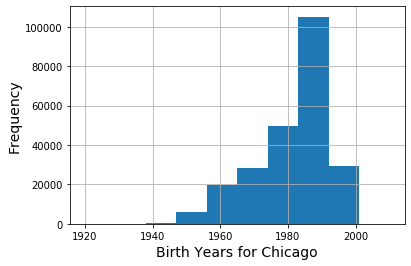

In [28]:
## Most common birth year for Chicago ##
plt.xlabel('Birth Years for Chicago', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
da1['Birth Year'].hist(range = [1920,2010])


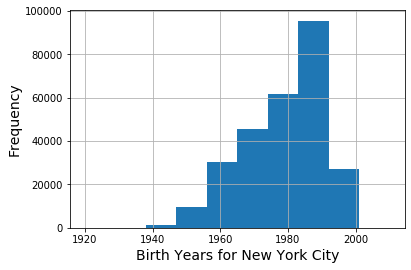

In [29]:
## Most common birth year for New York City ##
plt.xlabel('Birth Years for New York City', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
da2['Birth Year'].hist(range = [1920,2010])

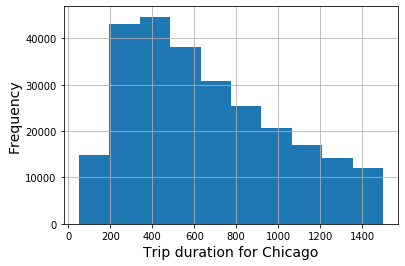

In [30]:
## Most common trip duration for Chicago ##
plt.xlabel('Trip duration for Chicago', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
da1['Trip Duration'].hist(range = [50,1500])

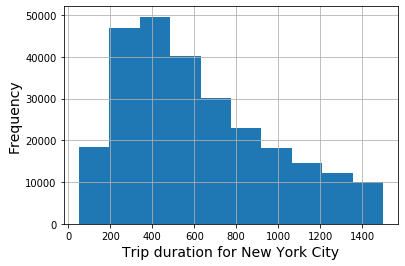

In [31]:
## Most common trip duration for New York City ##
plt.xlabel('Trip duration for New York City', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
da2['Trip Duration'].hist(range = [50,1500])

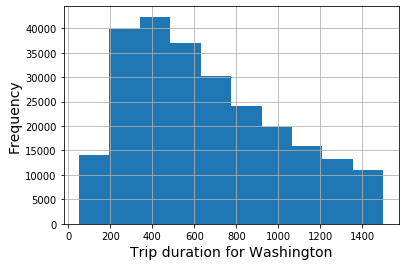

In [32]:
## Most common trip duration for Washington ##
plt.xlabel('Trip duration for Washington', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
da3['Trip Duration'].hist(range = [50,1500])